<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/exW7D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

In [7]:
import pandas as pd
df = pd.DataFrame(data)

In [8]:
df

,Review
0,At McDonald's the food was ok and the service ...
1,I would not recommend this Japanese restaurant...
2,I loved this restaurant when I traveled to Tha...
3,The menu of Loving has a wide variety of options.
4,The staff was friendly and helpful at Google's...
5,"The ambiance at Bella Italia is amazing, and t..."
6,I had a terrible experience at Pizza Hut. The ...
7,The sushi at Sushi Express is always fresh and...
8,The steakhouse on Main Street has a cozy atmos...
9,The dessert selection at Sweet Treats is to di...


# **Exercise 1**: Exploring Text Preprocessing usage, NER and POS tags

1. Create a function preprocess_text() wich will receive the data as argument and:

convert all the text in **lower case** and **tokanize it**

**remove punctuation**

apply a **lemmatizer**

return the preprocessed strings


important:

after creating each function, apply it in the dataset and print the result to check that is working properly


2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data


3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)


4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method


5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:

nltk.download('tagsets')

nltk.help.upenn_tagset('NN')


In [12]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Ensure necessary NLTK data is downloaded
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return the preprocessed text as a string
    # return ' '.join(tokens)
    return tokens
#create df_new as a copy of df
df_new = df

# Apply preprocessing to the 'Review' column
df_new['Processed_Review'] = df['Review'].apply(preprocess_text)

# Print the resulting DataFrame
print(df_new[['Review', 'Processed_Review']])

                                              Review  \
0  At McDonald's the food was ok and the service ...   
1  I would not recommend this Japanese restaurant...   
2  I loved this restaurant when I traveled to Tha...   
3  The menu of Loving has a wide variety of options.   
4  The staff was friendly and helpful at Google's...   
5  The ambiance at Bella Italia is amazing, and t...   
6  I had a terrible experience at Pizza Hut. The ...   
7  The sushi at Sushi Express is always fresh and...   
8  The steakhouse on Main Street has a cozy atmos...   
9  The dessert selection at Sweet Treats is to di...   

                                    Processed_Review  
0  [at, mcdonald, 's, the, food, wa, ok, and, the...  
1  [i, would, not, recommend, this, japanese, res...  
2  [i, loved, this, restaurant, when, i, traveled...  
3  [the, menu, of, loving, ha, a, wide, variety, ...  
4  [the, staff, wa, friendly, and, helpful, at, g...  
5  [the, ambiance, at, bella, italia, is, amazing... 

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)

In [6]:
import spacy

# Load spaCy's small English model (en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on the text
def perform_ner(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract entities and their labels
    entities = [(entity.text, entity.label_) for entity in doc.ents]

    return entities

# Apply the function
df_new['NER'] = df_new['Review'].apply(perform_ner)

# Print
df_new

,Review,Processed_Review,NER
0,At McDonald's the food was ok and the service ...,at mcdonald 's the food wa ok and the service ...,"[(McDonald, ORG)]"
1,I would not recommend this Japanese restaurant...,i would not recommend this japanese restaurant...,"[(Japanese, NORP)]"
2,I loved this restaurant when I traveled to Tha...,i loved this restaurant when i traveled to tha...,"[(Thailand, GPE), (last summer, DATE)]"
3,The menu of Loving has a wide variety of options.,the menu of loving ha a wide variety of option,"[(Loving, GPE)]"
4,The staff was friendly and helpful at Google's...,the staff wa friendly and helpful at google 's...,"[(Google, ORG)]"
5,"The ambiance at Bella Italia is amazing, and t...",the ambiance at bella italia is amazing and th...,"[(Bella Italia, ORG)]"
6,I had a terrible experience at Pizza Hut. The ...,i had a terrible experience at pizza hut the p...,"[(Pizza Hut, ORG)]"
7,The sushi at Sushi Express is always fresh and...,the sushi at sushi express is always fresh and...,"[(Sushi Express, ORG)]"
8,The steakhouse on Main Street has a cozy atmos...,the steakhouse on main street ha a cozy atmosp...,"[(Main Street, FAC)]"
9,The dessert selection at Sweet Treats is to di...,the dessert selection at sweet treat is to die...,"[(Sweet Treats, PERSON)]"


I tried to apply the ner function to "Processed_Review" but I got a better result after applying to "Review"

Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method

In [12]:
from nltk import pos_tag

# Download the 'averaged_perceptron_tagger_eng' resource
nltk.download('averaged_perceptron_tagger_eng')

# Function to perform POS tagging
def perform_pos_tagging(text):
    # Tokenize the input text
    tokens = word_tokenize(text)

    # Perform POS tagging on the tokens
    pos_tags = pos_tag(tokens)

    return pos_tags

# Example: Apply POS tagging to the 'Review' column
df_new['POS_Tags'] = df['Processed_Review'].apply(perform_pos_tagging)

# Print the resulting DataFrame with POS tags
df_new

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,Review,Processed_Review,NER,POS_Tags
0,At McDonald's the food was ok and the service ...,at mcdonald 's the food wa ok and the service ...,"[(McDonald, ORG)]","[(at, IN), (mcdonald, NN), ('s, POS), (the, DT..."
1,I would not recommend this Japanese restaurant...,i would not recommend this japanese restaurant...,"[(Japanese, NORP)]","[(i, NN), (would, MD), (not, RB), (recommend, ..."
2,I loved this restaurant when I traveled to Tha...,i loved this restaurant when i traveled to tha...,"[(Thailand, GPE), (last summer, DATE)]","[(i, NN), (loved, VBD), (this, DT), (restauran..."
3,The menu of Loving has a wide variety of options.,the menu of loving ha a wide variety of option,"[(Loving, GPE)]","[(the, DT), (menu, NN), (of, IN), (loving, VBG..."
4,The staff was friendly and helpful at Google's...,the staff wa friendly and helpful at google 's...,"[(Google, ORG)]","[(the, DT), (staff, NN), (wa, VBZ), (friendly,..."
5,"The ambiance at Bella Italia is amazing, and t...",the ambiance at bella italia is amazing and th...,"[(Bella Italia, ORG)]","[(the, DT), (ambiance, NN), (at, IN), (bella, ..."
6,I had a terrible experience at Pizza Hut. The ...,i had a terrible experience at pizza hut the p...,"[(Pizza Hut, ORG)]","[(i, NN), (had, VBD), (a, DT), (terrible, JJ),..."
7,The sushi at Sushi Express is always fresh and...,the sushi at sushi express is always fresh and...,"[(Sushi Express, ORG)]","[(the, DT), (sushi, NN), (at, IN), (sushi, NN)..."
8,The steakhouse on Main Street has a cozy atmos...,the steakhouse on main street ha a cozy atmosp...,"[(Main Street, FAC)]","[(the, DT), (steakhouse, NN), (on, IN), (main,..."
9,The dessert selection at Sweet Treats is to di...,the dessert selection at sweet treat is to die...,"[(Sweet Treats, PERSON)]","[(the, DT), (dessert, JJ), (selection, NN), (a..."


In [15]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


# **Exercise 2**: Plotting the word embeddings

1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?


2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.

Finally call this function to see the plots and analyse it:

Are the related words close to each other?

What can be the possible reasons for this output?


3. To enhance the analysis, you can:

Experiment with different preprocessing techniques.

Fine-tune the Word2Vec model parameters.

Explore advanced visualization techniques for word embeddings.

In [20]:
!pip install --upgrade numpy
!pip install --upgrade gensim --no-cache-dir --force-reinstall

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 M

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
word = "restaurant"
if word in model.key_to_index:
    similar_words = model.most_similar(word, topn=10)
    print(f"Words similar to '{word}':")
    for w, score in similar_words:
        print(f"{w}: {score}")
else:
    print(f"'{word}' not in vocabulary")

Words similar to 'restaurant':
eatery: 0.8687878847122192
Restaurant: 0.8076601028442383
restuarant: 0.7928975820541382
restaurants: 0.7722893357276917
diner: 0.7280216217041016
steakhouse: 0.7269853949546814
pizzeria: 0.7211981415748596
Bistro: 0.7206682562828064
bistro: 0.7058035731315613
Grill: 0.6980502009391785


this code used api with word2vec. Let's check the same word in our df

In [4]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df_new['Processed_Review'], vector_size=100, window=5, min_count=1, workers=4)

In [14]:
print("Vocabulary size:", len(word2vec_model.wv))
print("Vector dimensions:", word2vec_model.vector_size)

Vocabulary size: 73
Vector dimensions: 100


In [15]:
word = "restaurant"
if word in word2vec_model.wv:
    print(f"Vector for '{word}':\n", word2vec_model.wv[word])

Vector for 'restaurant':
 [ 8.1674177e-03 -4.4434578e-03  8.9869155e-03  8.2659107e-03
 -4.4314973e-03  3.0580675e-04  4.2812899e-03 -3.9270637e-03
 -5.5642766e-03 -6.5106759e-03 -6.6542660e-04 -3.0941010e-04
  4.4759647e-03 -2.4658025e-03 -1.6343854e-04  2.4637687e-03
  4.8691458e-03 -3.6001391e-05 -6.3445172e-03 -9.2667444e-03
  3.1576095e-05  6.6730543e-03  1.4718148e-03 -8.9723989e-03
 -7.9311794e-03  6.5554688e-03 -3.7862777e-03  6.2541878e-03
 -6.6812830e-03  8.4828380e-03 -6.4987689e-03  3.2782282e-03
 -1.0456725e-03 -6.7944699e-03 -3.2924237e-03 -1.1560653e-03
 -5.4703732e-03 -1.2058570e-03 -7.5593642e-03  2.6319039e-03
  9.0603707e-03 -2.3757631e-03 -9.7424950e-04  3.5081226e-03
  8.6704660e-03 -5.9208577e-03 -6.8949098e-03 -2.9305748e-03
  9.1437157e-03  8.6592342e-04 -8.6779315e-03 -1.4455951e-03
  9.4750645e-03 -7.5597763e-03 -5.3546685e-03  9.3133366e-03
 -8.9685004e-03  3.8292229e-03  6.6575530e-04  6.6592554e-03
  8.3019817e-03 -2.8566292e-03 -3.9834403e-03  8.9038936e-0

In [16]:
print(word2vec_model.wv.most_similar("restaurant"))

[('wide', 0.31969520449638367), ('bella', 0.2389550805091858), ('staff', 0.20403875410556793), ('hut', 0.19879348576068878), ('are', 0.19464409351348877), ('always', 0.1786397099494934), ('thailand', 0.1748707890510559), ('pasta', 0.14945431053638458), ('food', 0.12766991555690765), ('terrible', 0.12656861543655396)]


**Vector Dimensions**

Vector size: 100

Each word is represented as a 100-dimensional vector.

These 100 numbers capture the semantic meaning of the word in a high-dimensional space.

**What Does This Mean?**

Words are mapped into a continuous vector space, where similar words are positioned closer together.

The vector represents the meaning of the word based on its usage in the dataset.

The model learns word relationships from context:

Example: "restaurant" is close to "wide", "bella", "staff", "hut", "always", "pasta", "food" because they frequently co-occur in the dataset.

Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.

Finally call this function to see the plots and analyse it:

Are the related words close to each other?

What can be the possible reasons for this output?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


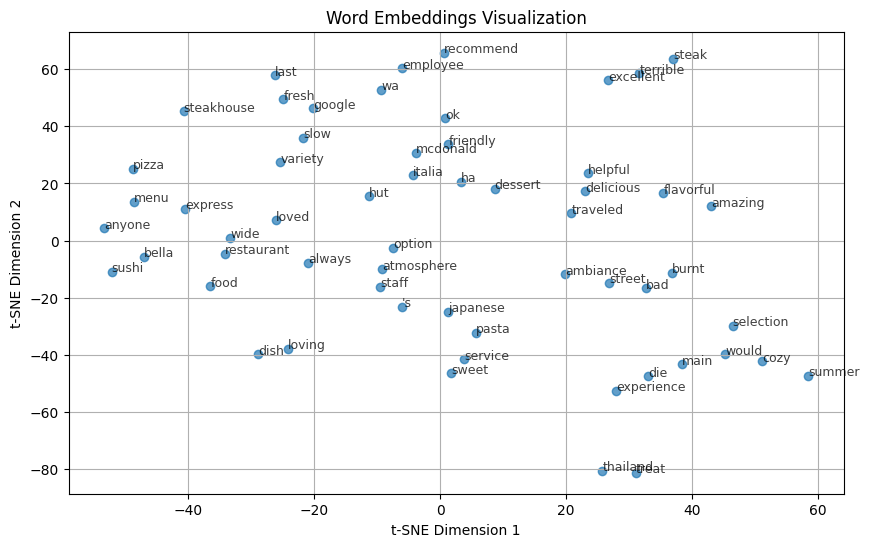

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_word_embeddings(word2vec_model):
    # Extract words and their corresponding vectors
    words = list(word2vec_model.wv.index_to_key)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Reduce dimensionality to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    # Annotate each point with the corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9, alpha=0.75)

    plt.title("Word Embeddings Visualization")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)
    plt.show()

# Call the function to visualize word embeddings
plot_word_embeddings(word2vec_model)


The related words are close to each other. Small Dataset: If words don’t have enough examples, their vectors won’t be meaningful.

To enhance the analysis, you can:

Experiment with different preprocessing techniques.

Fine-tune the Word2Vec model parameters.

Explore advanced visualization techniques for word embeddings.

In [19]:
# Fine-tune the Word2Vec model parameters.
word2vec_model = Word2Vec(
    sentences=df['Processed_Review'],
    vector_size=150,   # Increase embedding size
    window=8,          # Expand context window
    min_count=2,       # Ignore very rare words
    workers=4,         # Use multiple CPU cores
    sg=1,              # Use Skip-gram (sg=1) instead of CBOW (sg=0)
    epochs=20          # Train for more iterations
)


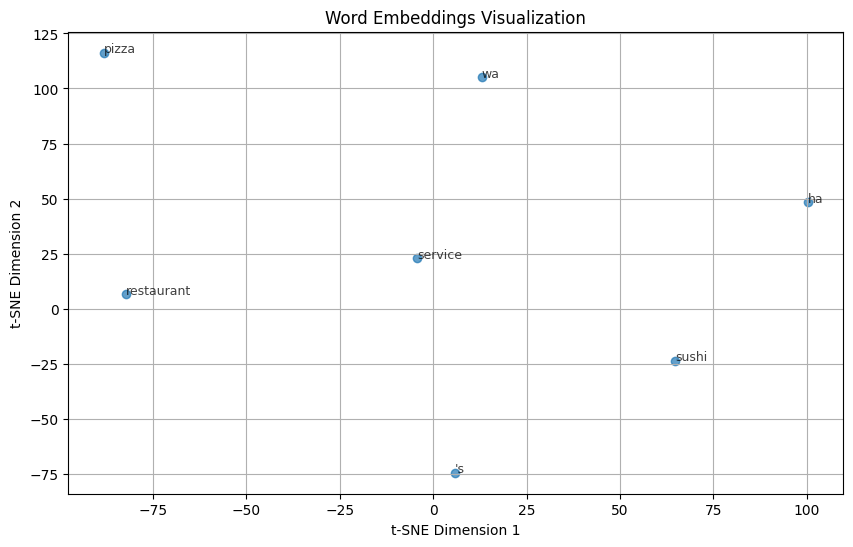

In [23]:
def plot_word_embeddings(word2vec_model):
    # Extract words and their corresponding vectors
    words = list(word2vec_model.wv.index_to_key)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Reduce dimensionality to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    # Annotate each point with the corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9, alpha=0.75)

    plt.title("Word Embeddings Visualization")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)
    plt.show()

# Call the function to visualize word embeddings
plot_word_embeddings(word2vec_model)

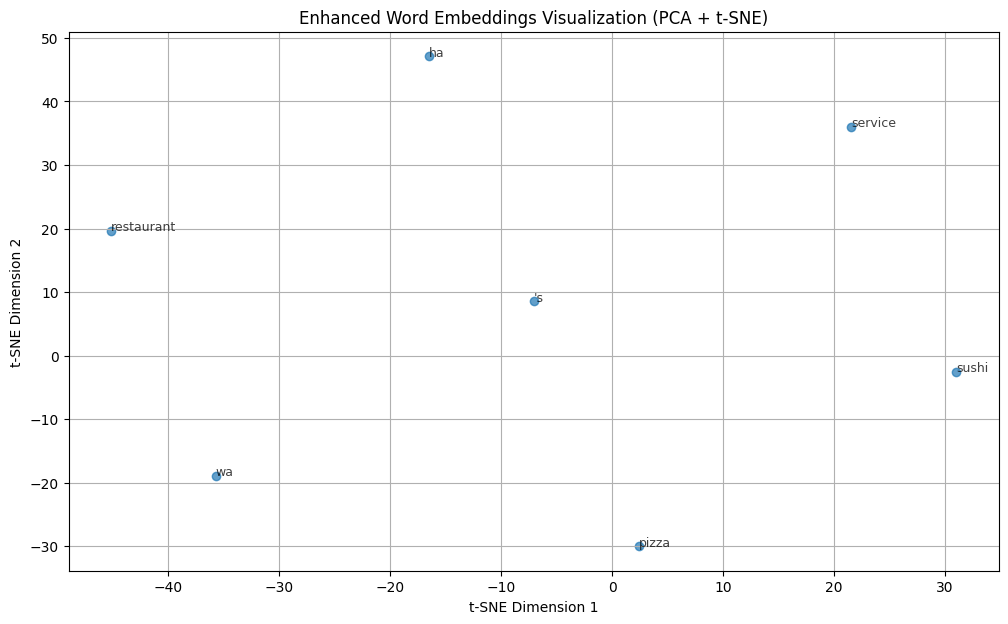

In [30]:
from sklearn.decomposition import PCA

def plot_embeddings_advanced(word2vec_model):
    words = list(word2vec_model.wv.index_to_key)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    word_vectors = np.array([word2vec_model.wv[word] for word in words])

    # Apply PCA first for dimensionality reduction
    n_components = min(15, len(words), word2vec_model.vector_size)  # Adjust n_components
    pca = PCA(n_components=n_components)  # Reduce to a suitable number of dimensions before t-SNE
    word_vectors_pca = pca.fit_transform(word_vectors)

    # Apply t-SNE after PCA
    # perplexity should be less than n_samples
    # Calculating perplexity based on the number of samples
    perplexity_value = min(15, len(words) - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors_pca)

    plt.figure(figsize=(12, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9, alpha=0.75)

    plt.title("Enhanced Word Embeddings Visualization (PCA + t-SNE)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)
    plt.show()

plot_embeddings_advanced(word2vec_model)
